# Fully Connected neural Layer as encoder and decoder

### Import Statements

In [1]:
# Import libraries as required 
from keras.layers import Dense, Input
from keras.models import Model
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


### Load the Dataset

In [2]:
# see the docs to load the mnist dataset 
(X_train,y_train), (X_test, y_test) = mnist.load_data()

### Normalize and Reshape the dataset

In [3]:
# Normalize the Dataset
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

# Reshape the Dataset (Number_of_images, total pixels)
# Hint -> total pixels = 28*28 = 784
X_train = X_train.reshape(len(X_train),np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test),np.prod(X_test.shape[1:]))

In [4]:
# Define the size of our encoded representations
encoding_dim = 32 

# create a input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [5]:
# Define a model that maps an input to its encoded representation
encoder = Model(input_img, encoded)

# Define a model that maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [6]:
# create a placeholder for an encoded input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

### Let's train our autoencoder to reconstruct MNIST digits

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',)

In [8]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.3610 - val_loss: 0.2719
Epoch 2/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.2650 - val_loss: 0.2544
Epoch 3/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.2449 - val_loss: 0.2334
Epoch 4/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2260 - val_loss: 0.2161
Epoch 5/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.2104 - val_loss: 0.2019
Epoch 6/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.1978 - val_loss: 0.1910
Epoch 7/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1882 - val_loss: 0.1826
Epoch 8/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1808 - val_loss: 0.1761
Epoch 9/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.1746 - val_loss: 0.1704
Epoch

In [10]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

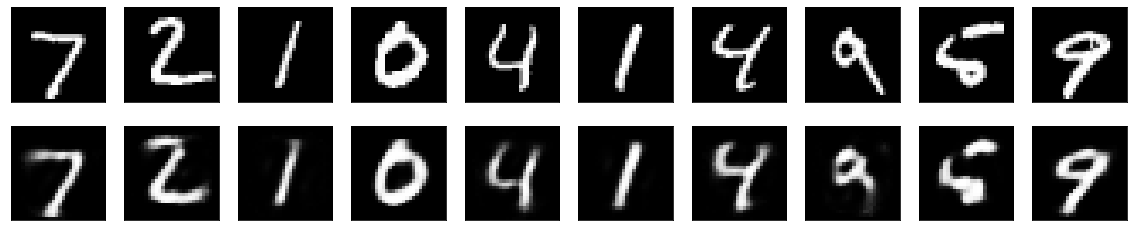

In [12]:
# use Matplotlib to display Images
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()